<center> <font size=6> <b> Table of Contents </b> </font> </center> 
<div id="toc"></div>

The following cell is a Javascript section of code for building the Jupyter notebook's table of content.

In [2]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

**-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-**

<center> <font size=5> <h1>Define working environment</h1> </font> </center> 

In [10]:
%matplotlib inline
%load_ext autoreload
%autoreload 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
# Add local module to the path
src = os.path.abspath('../src')
if src not in sys.path:
    sys.path.append(src)

**Import libraries**

The following cells are used to: 
- Import needed libraries
- Set the environment variables for Python, Anaconda, GRASS GIS and R statistical computing 
- Define the ["GRASSDATA" folder](https://grass.osgeo.org/grass73/manuals/helptext.html), the name of "location" and "mapset" where you will to work.

In [19]:
## Import libraries needed for setting parameters of operating system 
import os
import sys

## Import library for temporary files creation 
import tempfile 

## Import Pandas library
import pandas as pd

## Import Numpy library
import numpy as np

## Import Matplotlib for creating graphs
import matplotlib as mpl 
import matplotlib.pyplot as plt 

## agg backend is used to create plot as a .png file
mpl.use('agg')

In [23]:
# Set environmental variables
%run ../SRC/set_environ_variables.py

<center> <font size=3> <h3>Environment variables when working on Linux Mint</h3> </font> </center> 

**Set 'Python' and 'GRASS GIS' environment variables**

Here, we set [the environment variables allowing to use of GRASS GIS](https://grass.osgeo.org/grass64/manuals/variables.html) inside this Jupyter notebook. Please change the directory path according to your own system configuration.

In [5]:
### Define GRASS GIS environment variables for LINUX UBUNTU Mint 18.1 (Serena)
# Check is environmental variables exists and create them (empty) if not exists.
if not 'PYTHONPATH' in os.environ:
    os.environ['PYTHONPATH']=''
if not 'LD_LIBRARY_PATH' in os.environ:
    os.environ['LD_LIBRARY_PATH']=''
# Set environmental variables
os.environ['GISBASE'] = '/home/tais/SRC/GRASS/grass_trunk/dist.x86_64-pc-linux-gnu'
os.environ['PATH'] += os.pathsep + os.path.join(os.environ['GISBASE'],'bin')
os.environ['PATH'] += os.pathsep + os.path.join(os.environ['GISBASE'],'script')
os.environ['PATH'] += os.pathsep + os.path.join(os.environ['GISBASE'],'lib')
#os.environ['PATH'] += os.pathsep + os.path.join(os.environ['GISBASE'],'etc','python')
os.environ['PYTHONPATH'] += os.pathsep + os.path.join(os.environ['GISBASE'],'etc','python')
os.environ['PYTHONPATH'] += os.pathsep + os.path.join(os.environ['GISBASE'],'etc','python','grass')
os.environ['PYTHONPATH'] += os.pathsep + os.path.join(os.environ['GISBASE'],'etc','python','grass','script')
os.environ['PYTHONLIB'] = '/usr/lib/python2.7'
os.environ['LD_LIBRARY_PATH'] += os.pathsep + os.path.join(os.environ['GISBASE'],'lib')
os.environ['GIS_LOCK'] = '$$'
os.environ['GISRC'] = os.path.join(os.environ['HOME'],'.grass7','rc')

## Define GRASS-Python environment
sys.path.append(os.path.join(os.environ['GISBASE'],'etc','python'))

**-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-**

**Display current environment variables of your computer**

In [6]:
## Display the current defined environment variables
for key in os.environ.keys():
    print "%s = %s \t" % (key,os.environ[key])

MDMSESSION = mate 	
MANDATORY_PATH = /usr/share/gconf/mate.mandatory.path 	
MATE_DESKTOP_SESSION_ID = this-is-deprecated 	
LESSOPEN = | /usr/bin/lesspipe %s 	
MDM_LANG = fr_BE.UTF-8 	
LOGNAME = tais 	
USER = tais 	
HOME = /home/tais 	
XDG_VTNR = 8 	
PATH = /usr/local/bin:/home/tais/BIN:/home/tais/bin:/home/tais/.local/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/home/tais/SRC/GRASS/grass_trunk/dist.x86_64-pc-linux-gnu/bin:/home/tais/SRC/GRASS/grass_trunk/dist.x86_64-pc-linux-gnu/script:/home/tais/SRC/GRASS/grass_trunk/dist.x86_64-pc-linux-gnu/lib 	
CLICOLOR = 1 	
DISPLAY = :0.0 	
SSH_AGENT_PID = 1876 	
LANG = fr_BE.UTF-8 	
TERM = xterm-color 	
SHELL = /bin/bash 	
GIS_LOCK = $$ 	
XAUTHORITY = /home/tais/.Xauthority 	
SESSION_MANAGER = local/tais-HP-Z620-Workstation:@/tmp/.ICE-unix/1805,unix/tais-HP-Z620-Workstation:/tmp/.ICE-unix/1805 	
SHLVL = 1 	
QT_LINUX_ACCESSIBILITY_ALWAYS_ON = 1 	
INSIDE_CAJA_PYTHON =  	
QT_ACCESSIBILITY = 1 	
LD_LI

**-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-**

<center> <font size=5> <h1>User inputs</h1> </font> </center> 

**Import GRASS Python packages**

In [50]:
## Import libraries needed to launch GRASS GIS in the jupyter notebook
import grass.script.setup as gsetup

## Import libraries needed to call GRASS using Python
import grass.script as gscript

Here after:
- Enter the path to the directory you want to use as "[GRASSDATA](https://grass.osgeo.org/programming7/loc_struct.png)". 
- Enter the name of the location in which you want to work and its projection information in [EPSG code](http://spatialreference.org/ref/epsg/) format. Please note that the GRASSDATA folder and locations will be automatically created if not existing yet. If the location name already exists, the projection information will not be used.  
- Enter the name you want for the mapsets which will be used later for Unsupervised Segmentation Parameter Optimization (USPO), Segmentation and Classification steps.

In [21]:
## Define a empty dictionnary for saving user inputs
user={}

In [22]:
## Enter the path to GRASSDATA folder
user["gisdb"] = "/media/tais/My_Book_1/MAUPP/Traitement/Dakar/Dakar_dasymetry/GRASSDATA"
## Enter the name of the location (existing or for a new one)
user["location"] = "Dakar_32628"
## Enter the EPSG code for this location 
user["locationepsg"] = "32628"
## Enter the name of the mapset to use for segmentation
user["permanent_mapset"] = "PERMANENT"

**Check for existance of GRASSDATA folder, location and mapsets**

Here after, the python script will check if GRASSDATA folder, locations and mapsets already exist. If not, they will be automatically created

In [23]:
## Automatic creation of GRASSDATA folder
if os.path.exists(user["gisdb"]):
    print "GRASSDATA folder already exist" 
else: 
    os.makedirs(user["gisdb"]) 
    print "GRASSDATA folder created in "+user["gisdb"]

GRASSDATA folder already exist


In [24]:
## Automatic creation of GRASS location is doesn't exist
if os.path.exists(os.path.join(user["gisdb"],user["location"])):
    print "Location "+user["location"]+" already exist" 
else : 
    grass.core.create_location(user["gisdb"], user["location"], epsg=user["locationepsg"], overwrite=False)
    print "Location "+user["location"]+" created"

Location Dakar_32628 already exist


In [25]:
### Automatic creation of GRASS GIS mapsets

## Import library for file copying 
import shutil

if os.path.exists(os.path.join(user["gisdb"],user["location"],user["permanent_mapset"])):
    if not os.path.exists(os.path.join(user["gisdb"],user["location"],user["permanent_mapset"],'WIND')):
        print "WARNING: '"+user["permanent_mapset"]+"' mapset already exist, but a 'WIND' file is missing. Please solve this issue."
    else: print "'"+user["permanent_mapset"]+"' mapset already exist" 
else: 
    os.makedirs(os.path.join(user["gisdb"],user["location"],user["permanent_mapset"]))
    shutil.copy(os.path.join(user["gisdb"],user["location"],'PERMANENT','WIND'),
                os.path.join(user["gisdb"],user["location"],user["permanent_mapset"],'WIND'))
    print "'"+user["permanent_mapset"]+"' mapset created in location '"+user["location"]+"'"

'PERMANENT' mapset already exist


**-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-**

<center> <font size=5> <h1>Define functions</h1> </font> </center> 

This section of the notebook is dedicated to defining functions which will then be called later in the script. If you want to create your own functions, define them here.

### Function for computing processing time

The "print_processing_time" is used to calculate and display the processing time for various stages of the processing chain. At the beginning of each major step, the current time is stored in a new variable, using [time.time() function](https://docs.python.org/2/library/time.html). At the end of the stage in question, the "print_processing_time" function is called and takes as argument the name of this new variable containing the recorded time at the beginning of the stage, and an output message.

In [26]:
## Import library for managing time in python
import time  

## Function "print_processing_time()" compute processing time and printing it.
# The argument "begintime" wait for a variable containing the begintime (result of time.time()) of the process for which to compute processing time.
# The argument "printmessage" wait for a string format with information about the process. 
def print_processing_time(begintime, printmessage):    
    endtime=time.time()           
    processtime=endtime-begintime
    remainingtime=processtime

    days=int((remainingtime)/86400)
    remainingtime-=(days*86400)
    hours=int((remainingtime)/3600)
    remainingtime-=(hours*3600)
    minutes=int((remainingtime)/60)
    remainingtime-=(minutes*60)
    seconds=round((remainingtime)%60,1)

    if processtime<60:
        finalprintmessage=str(printmessage)+str(seconds)+" seconds"
    elif processtime<3600:
        finalprintmessage=str(printmessage)+str(minutes)+" minutes and "+str(seconds)+" seconds"
    elif processtime<86400:
        finalprintmessage=str(printmessage)+str(hours)+" hours and "+str(minutes)+" minutes and "+str(seconds)+" seconds"
    elif processtime>=86400:
        finalprintmessage=str(printmessage)+str(days)+" days, "+str(hours)+" hours and "+str(minutes)+" minutes and "+str(seconds)+" seconds"
    
    return finalprintmessage

### Function for generating random string

Usefull to generate random name of temporary layers

In [40]:
def random_string(N):
    '''
    Function generating a random string of size N
    '''
    import random, string
    prefix=random.choice(string.ascii_uppercase + string.ascii_lowercase)
    suffix=''.join(random.choice(string.ascii_uppercase + string.ascii_lowercase + string.digits) for _ in range(N))
    return prefix+suffix

**-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-**

In [27]:
## Saving current time for processing time management
begintime_full=time.time()

<center> <font size=5> <h1>1 - Importing data in PERMANENT mapset </h1> </font>  </center> 

Usually, original data are imported and stored in the "PERMANENT" mapset (automatically created when creating a new location).

**Launch GRASS GIS working session**

In [28]:
## Save the name of the mapset in which to import the data
mapsetname='PERMANENT'

## Launch GRASS GIS working session in the mapset
if os.path.exists(os.path.join(user["gisdb"],user["location"],mapsetname)):
    gsetup.init(os.environ['GISBASE'], user["gisdb"], user["location"], mapsetname)
    print "You are now working in mapset '"+mapsetname+"'" 
else: 
    print "'"+mapsetname+"' mapset doesn't exists in "+user["gisdb"]

You are now working in mapset 'PERMANENT'


In [29]:
## Saving current time for processing time management
begintime_importingdata=time.time()

## Land cover

In [31]:
## Set the name of the land cover raster
lc='landcover'

In [32]:
## Set the path to the land cover raster
pathtodata="/media/tais/My_Book_1/MAUPP/Traitement/Dakar/Dakar_dasymetry/data/postclassif_map_8_slitbuildings_modalfilter3.tif"
## Saving current time for processing time management
begintime=time.time()
## Import raster
print ("Importing land cover raster at " + time.ctime())
gscript.run_command('r.import', input=pathtodata, output=lc, overwrite=True)       
print_processing_time(begintime ,"Land cover raster has been imported in ")

Importing land cover raster at Wed Aug  1 16:25:37 2018


'Optical imagery has been imported in 1 minutes and 41.2 seconds'

**Set and save default computational region**

In [42]:
## Set the computational region based on land cover raster and save it as default region
gscript.run_command('g.region', flags='s', raster=lc)

0

## Land use

In [38]:
## Set a name for the land use layer
lu='landuse'

In [41]:
## Set the path to the land use vector
pathtodata="/media/tais/My_Book_1/MAUPP/Traitement/Dakar/Dakar_dasymetry/data/Dakar_landuse.shp"
## Saving current time for processing time management
begintime=time.time()
## Import vector layer as temporary
print ("Importing temporary land use vector at " + time.ctime())
tmp_file=random_string(25)
gscript.run_command('v.import', input=pathtodata, output=tmp_file, overwrite=True)       
print_processing_time(begintime ,"Land use vector has been imported in ")

Importing temporary land use vector at Thu Aug  2 11:04:43 2018


'Land use vector has been imported in 39.6 seconds'

### Convert vector to raster

In [55]:
## Set the name of the columns containing land use code
code_column='MAP_CODE'
## Set the name of the columns containing land use labels
label_column='MAP_LABEL'

In [56]:
## Saving current time for processing time management
begintime=time.time()
## Convert vector layer to raster layer
print ("Starting at " + time.ctime())
print ("Set computational region to default")
gscript.run_command('g.region', flags='d') # Set the region to default region
print ("Converting vector land use layer to raster")
gscript.run_command('v.to.rast', overwrite=True,
                  input=tmp_file, output=lu, 
                  use='attr', attribute_column=code_column, label_column=label_column, memory=5000)
print_processing_time(begintime ,"Process finished in ")

Starting at Thu Aug  2 11:40:17 2018
Set computational region to default
Converting vector land use layer to raster


'Process finished in 2 minutes and 35.5 seconds'

In [57]:
## Remove temporary land use vector layer
gscript.run_command('g.remove', flags="f", type="raster", name=tmp_file)

0

### Set up meaningfull colors to the landuse raster (optionally)

**Define color rules for the classification maps**

In [58]:
# Define color table. Replace with the RGB values of wanted colors of each pixel value
color_rule="1 96:218:105"+"\n"
color_rule+="2 52:164:0"+"\n"
color_rule+="3 246:237:197"+"\n"
color_rule+="4  207:67:205"+"\n"
color_rule+="5  229:107:54"+"\n"
color_rule+="6  255:184:61"+"\n"
color_rule+="7  227:23:50"+"\n"
color_rule+="8  176:176:176"+"\n"

## Create a temporary 'colors_landuse.txt' file
colors_landuse=gscript.tempfile()+"colors_landuse" # Define the csv output file name
f = open(colors_landuse, 'w')
f.write(color_rule)
f.close()

**Apply color**

In [59]:
## Apply color
gscript.run_command('r.colors', map=lu, rules=colors_landuse)

0

## Population data

In [73]:
## Set the path to the census population data (vector)
pop_shp="/media/tais/data/Dropbox/ULB/MAUPP/Coordination collaborateurs sur place/WP6_populeation_limitesadmin/Dakar_StLouis/Dakar_admin5_Assane/quartier_dkr/Export_Output.shp"
## Define the name of the colum containing finest admin level ID (admin1)
admin1_column="Quartier"
## Define the name of the colum containing the ID of the admin level just coarser than admin1 (admin0)
admin0_column="Commune"
## Define the name of the colum containing the population count
pop_column="POPULATION"

In [61]:
## Define a name for the admin1 layer
admin1_layer="admin1"
## Define a name for the admin0 layer
admin0_layer="admin0"

**Import admin1 data**

In [62]:
## Import vector layer as temporary
gscript.run_command('v.import', input=pop_shp, output=admin1_layer, overwrite=True)       

0

**Create admin0 level by merging admin1 polygons**

## Import OSM road network

In [74]:
## Set the path to the folder where to save the OpenStreetMap data
osm_folder='/media/tais/My_Book_1/MAUPP/Traitement/Dakar/Dakar_dasymetry/data/OSM_roads'

In [122]:
import pandas as pd
import geopandas as gpd
import pyproj
from shapely.geometry import shape
from shapely.ops import transform

## Import the Area Of Interest (AOI) polygon
aoi_gdf=gpd.read_file(pop_shp)
# Union all administratives units to get one geometry
from shapely.ops import cascaded_union
boundary = gpd.GeoSeries(cascaded_union(aoi_gdf.geometry))

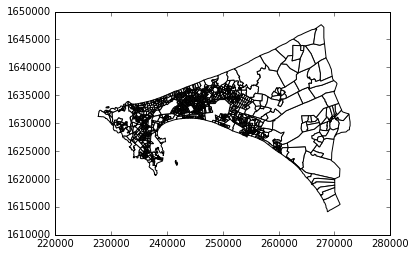

In [109]:
# Display
aoi_gdf.plot(color = 'white')
plt.show()

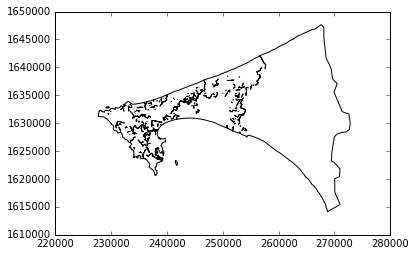

In [110]:
# Display
boundary.plot(color = 'white')
plt.show()

In [119]:
boundary.project

<bound method GeoSeries.project of 0    (POLYGON ((241653.1971451397 1623067.609090711...
dtype: object>

In [115]:
## Define a function that transform the CRS of a geodataframe
def tranform_crs(geom,crs_from, crs_to):
    s = shape(geom)
    proj = partial(pyproj.transform, pyproj.Proj(init=crs_from),
                   pyproj.Proj(init=crs_to))
    s_new = transform(proj, s)
    projected_area = transform(proj, s).area
    return projected_area

In [116]:
# If shapefile CRS is not EPSG:4326, it will be converted to get bbox coordinates in WGS84
if boundary.crs['init']!='epsg:4326':
    print("Input Shapefile's EPSG is %s and will be converted to EPSG:4326")%aoi_gdf.crs['init']

TypeError: 'NoneType' object has no attribute '__getitem__'

In [118]:
boundary.crs['init']

TypeError: 'NoneType' object has no attribute '__getitem__'

In [117]:
tranform_crs(boundary,boundary.crs['init'], 'epsg:4326')

TypeError: 'NoneType' object has no attribute '__getitem__'

In [113]:
## Get the coordinates of the 
minLon=float(boundary.bounds['minx'])
minLat=float(boundary.bounds['miny'])
maxLon=float(boundary.bounds['maxx'])
maxLat=float(boundary.bounds['maxy'])
bbox_geom=[minLon,minLat,maxLon,maxLat]
print bbox_geom

[227622.53391815163, 1614133.1797043262, 272805.97916296613, 1647656.2500000033]


In [ ]:
highway_values=['motorway','primary','secondary','tertiary','unclassified','residential','track','path','','']

In [ ]:
http://www.overpass-api.de/api/xapi?*[bbox=-17.560959,14.595545,-17.131119,14.911280][highway=motorway]

In [ ]:
## Get the bbox coordinates of the Area Of Interest (population data)
north_coord=
south_coord=
west_coord=
east_coord=

In [ ]:
import urllib

## Saving current time for processing time management
begintime_download=time.time()
  

    print "OSM data will be downloaded for tile n°"+str(tilenum)+" (W:"+str(west_coord)+" S:"+str(south_coord)+" E:"+str(east_coord)+" N:"+str(north_coord)+")"
    
    osm_api_base_url="http://www.overpass-api.de/api/xapi?*"
    osm_api_query_url=osm_api_base_url+"[bbox="+str(west_coord)+","+str(south_coord)+","+str(east_coord)+","+str(north_coord)+"][@meta]"
    
    #osm_file=user["osmfolder"]+"/"+user["prefixosm"]+"_"+str(now.year)+str(now.month)+str(now.day)+"_"+str(tilenum)+".osm"
    osm_file=os.path.join(user["osmfolder"],user["prefixosm"]+"_"+date_suffix+"_"+str(tilenum)+".osm")

    success=False
    while success==False and (time.time()-loopstarttime)<1800:  # Will stop looping is running for more than 30 minutes
        try:
            urllib.urlretrieve(osm_api_query_url, osm_file)
        except:
            print "An error occured for tile n°%s. Please check and retry."%tilenum
        if os.stat(osm_file).st_size>280: # If the .osm file do not contain any geometry (size should be less than 275 bytes)
            success=True
            
    print osm_api_query_url
    
## Print
print print_processing_time(begintime_download, "OSM Data downloaded in ")

Please adapt the number of lines in the loop to match the number of layers stacked in your imagery file (just as much ['g.rename' command](https://grass.osgeo.org/grass73/manuals/g.rename.html) lines as layers stacked). Be careful to adapt well the correspondence between the name of the layer and its place in the layers stack (e.g. "opt_blue" for the first layer).

Please note that it is assumed that you have at least a red band layer, called "opt_red". If not, you would have to change several parameters through this notebook, notably when defining [computation region](https://grasswiki.osgeo.org/wiki/Computational_region). 

### Import nDSM raster imagery 

If you have null value in your nDSM raster, please be careful to define the "setnull" parameter of ['r.null' command](https://grass.osgeo.org/grass73/manuals/r.null.html) well, according to your own data. If you didn't have any null values in your nDSM raster, simply comment the r.null command line with an '#' as first character (to put it in [comment](http://www.pythonforbeginners.com/comments/comments-in-python)). Notice that you can display the line's number by pressing the L key when cell edge is in blue.

-  Specifically to our data, our nDSM have *null values* which have been defined during the importation of the raw data, those *null values* (which correspond, in our case, most of the time to missed pixels in the stereo-photogrammetry process) have to be set to zero values of elevation (with the ['r.null' command](https://grass.osgeo.org/grass72/manuals/r.null.html)). Those missed pixels are for almost water surfaces (0 elevation on nDSM) or hidden side of buildings.

-  If you are working with a nDSM data which didn't have any null values, please skip the following cell.

### Import textures features

### Import VHR SAR features raster

VHR SAR features have been computed with convolutional window of 7x7 and 11x11

**VHR Radarsat2 preprocessed layer (calibrated mosaic, speckle filtered 3x3 and histogram cutted for very high values**

**3x3 features**

**7x7 features**

**11x11 features**

**-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-**

### Save default GRASS GIS' computational region for the whole extent of optical imagery

In GRASS GIS, the concept of computational region is fundamental. We highly recommend reading [information about the computation region in GRASS GIS](https://grasswiki.osgeo.org/wiki/Computational_region) to be sure to understand the concept. 

Here after, the 'default' computational region is defined as corresponding to the red band image.

In [26]:
## Save default computational region to match the full extend of optical imagery
gscript.run_command('g.region', flags="s", raster="opt_red@PERMANENT")

0

**-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-**

## Compute pseudo-band raster

### Set computational region and mask layer

The ['r.mask' command](https://grass.osgeo.org/grass73/manuals/r.mask.html) is used not to perform further processing on 'nodata' pixels.

### Compute NDVI (Normalized difference vegetation index) 

Here after, we use the [r.mapcalc command](https://grass.osgeo.org/grass73/manuals/r.mapcalc.html) to compute NDVI (Normalized difference vegetation index) indice.

### Compute NDWI (Normalized difference water index) 

Here after, we use the [r.mapcalc command](https://grass.osgeo.org/grass73/manuals/r.mapcalc.html) to compute the normalized difference water index (NDWI) as indice. The formula used was proposed by [McFeeters in 1996](http://www.tandfonline.com/doi/abs/10.1080/01431169608948714).

### Compute SSI (Spectral Shape Index) 

Here after, we use the [r.mapcalc command](https://grass.osgeo.org/grass73/manuals/r.mapcalc.html) to compute the Spectral Shape Index (SSI). The formula used was proposed by Dou and Chen in 2005 (see [Chen & al. 2009](http://www.sciencedirect.com/science/article/pii/S0273117708005735) for a reference).

### Compute brightness 

Here after, we use the [r.mapcalc command](https://grass.osgeo.org/grass73/manuals/r.mapcalc.html) to compute the brightness indice defined as the sum of visible bands.

### Compute texture 

Here, we use ['r.texture' command](https://grass.osgeo.org/grass73/manuals/r.texture.html) to compute angular second moment with 5x5 moving window. This texture layer is not currently being used in the process, but you can adapt the script if you want to use it. Other textures can also be computed using the 'r.texture' command.

**-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-**

### Remove current mask

**-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-**

<left> <font size=4> <b> End of part 1 </b> </font> </left> 

In [27]:
print("Importation of data ends at "+ time.ctime())
print_processing_time(begintime_importingdata, "Importation of data has been achieved in :")

Importation of data ends at Wed Sep  6 13:33:29 2017


'Importation of data has been achieved in :24 minutes and 20.6 seconds'

**-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-**

<center> *-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*- </center> 

**-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-**

<center> <font size=5> <h1>Segmentation using local optimization approach</h1> </font> </center> 

Segmentation C : First random rectangle is created inside each morphological zone (about 290 zones). These rectangles are used as computational regions for i.segment.uspo in order to find optimized segmentation parameters for each zone. 

With this stategy, morphological zones corresponding to the same morphological type should then be segmented with different parameters. The objective is to improve the segmentation results (in terms of intra-object homogeneity (variance)) and also to analyse the distribution of segmentation paramters inside a morphological type. 

**Launch GRASS GIS working session**

In [29]:
## Set the name of the mapset in which to work
mapsetname=user["segmentation_mapsetname"]

## Launch GRASS GIS working session in the mapset
if os.path.exists(os.path.join(user["gisdb"],user["location"],mapsetname)):
    gsetup.init(os.environ['GISBASE'], user["gisdb"], user["location"], mapsetname)
    print "You are now working in mapset '"+mapsetname+"'" 
else: 
    print "'"+mapsetname+"' mapset doesn't exists in "+user["gisdb"]

You are now working in mapset 'LOCAL_SEGMENT'


In the next cell, please adapt the path to the directory where you want to save the .csv output of i.segment.uspo.

In [30]:
## Folder in which save processing time output
resultfolder="/media/tais/data/MAUPP/WorldView3_Ouagadougou/Segmentation"
outputfolder=os.path.join(resultfolder,mapsetname,"i.segment.uspo")

In [31]:
## Create the folder if does not exists
if not os.path.exists(outputfolder):
    os.makedirs(outputfolder)
    print "Folder '"+outputfolder+"' created"

Folder '/media/tais/data/MAUPP/WorldView3_Ouagadougou/Segmentation/LOCAL_SEGMENT/i.segment.uspo' created


**-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-**

## Create imagery group

In GRASS GIS several operations, mainly segmentation when dealing with OBIA, wait for a 'imagery group'.

In the next cell, a new imagery group called 'optical' and containing the optical rasters is created with ['i.group command'](https://grass.osgeo.org/grass73/manuals/i.group.html). As it is impossible to create a new imagery group if there already exists an imagery group with the same name, potential imagery group is removed (with ['g.remove command'](https://grass.osgeo.org/grass73/manuals/g.remove.html)), if it exists.

We need to create an imagery group for i.segment.uspo. In GRASS GIS, these imagery groups contain raster layers to use to a speficic task. Here, for i.segment.uspo, we define and use the same imagery group of layers for both segmentation and parameter optimization. You could use different imagery groups for segmentation and parameter optimization (e.g. you could segment using only optical data and optimize the segmentation parameter based on a specific indice like NDVI i.e.). 

Here, we use the 4 optical layers and the NDVI layer for the segmentation and the USPO step. If you want to use other layers, please adapt the script accordingly. If you make changes, please be careful to use the same layer for the segmentation in i.segment.uspo and for further segmentation step (with i.segment). 

### Update imagery group "VNIR" with optical rasters (red, green, blue, Nir)

In [32]:
print ("Updating imagery group 'optical' with optical rasters at " + time.ctime())

## Remove existing imagery group nammed "optical". This group was created when importing multilayer raster data
gscript.run_command("g.remove", type="group", name="VNIR", flags="f")

## Add each raster which begun with the prefix "opt" into a new imagery group "optical"
for rast in grass.list_strings("rast", pattern="opt", flag="r"):
    gscript.run_command("i.group", group="VNIR", input=rast)
    
## Print layer contained in the group
print "\n"+grass.read_command("i.group", group="VNIR", flags="l")

Updating imagery group 'optical' with optical rasters at Wed Sep  6 13:33:29 2017

Le groupe <VNIR> référence les cartes raster suivantes
-------------
<opt_blue@PERMANENT>     <opt_green@PERMANENT>    <opt_nir@PERMANENT>      
<opt_red@PERMANENT>      
-------------



**-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-**

## Import morphological zones (to be used as processing tiles)

In [33]:
## Set the path to the image file
pathtodata="/media/tais/data/MAUPP/WorldView3_Ouagadougou/Segmentation/Morphological_zones/Zone_morpho_Ouaga_refined.shp"

## Print
print ('Importing morphological zones to be used. '+ time.ctime())

## Import vectorial morphological zones layers
gscript.run_command('v.import', overwrite=True, input=pathtodata, output="zone_morpho")

Importing morphological zones to be used. Wed Sep  6 13:33:30 2017


0

**-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-**

## Create raster mask

In [34]:
## Define computational region
gscript.run_command('g.region', flags="d")
# Rasterise the morphological zones
gscript.run_command('v.to.rast', overwrite=True, input="zone_morpho", type="area",
                  output="zone_morpho", use="cat")

0

**-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-**

## Unsupervised Segmentation Parameter Optimization with i.segment.uspo

The [i.segment.uspo add-on](https://grass.osgeo.org/grass70/manuals/addons/i.segment.uspo.html) is used to automatically find the optimized segmentation parameter(s) for specific computational regions. We highly recommend reading of [the add-on help](https://grass.osgeo.org/grass70/manuals/addons/i.segment.uspo.html) to be sure to understand the different fonctionalities well.

### Unsupervised segmentation parameter optimisation with i.segment.uspo

- Please read the [i.segment.uspo](https://grass.osgeo.org/grass70/manuals/addons/i.segment.uspo.html) help to ensure you understand the extension well and you choose correctly the different parameters for your case. 
- It is recommended to quickly identify (by visual check) thresholds resulting in clearly oversegmentedand undersegmented segments, and use those thresholds as 'threshold_start' and 'threshold_start', respectively. 
- If the number of threshold/minsize combination to test is too big, running i.segment.uspo could be very time-consuming or even failed. In this case, please reduce the range and/or steps of thresholds and/or minsize to be tested. 
- Choose between the following optimization function: "sum" of [Espindola (2006)](http://www.tandfonline.com/doi/abs/10.1080/01431160600617194) or "F function" of [Johnson (2015)](http://www.mdpi.com/2220-9964/4/4/2292). 
- If you choose the "F function", please use an adapted alpha parameter. A value of alpha>1 is *"(...) appropriate for selecting the parameters for finer segmentation levels (to ensure that smaller objects of interest or objects spectrally-similar to their surroundings are not undersegmented at these levels), while values of a[alpha] < 1 may be more appropriate for selecting parameters for coarser segmentation levels (to ensure that larger/more heterogeneous objects of interest are not oversegmented at these levels)"* (Johnson et al., 2015, pp. 2295).
- Please notice that, for our requirements, the minsize parameter was set according to our MMU (Minimum Mapping Unit) and was not optimized with i.segment.uspo. You can change the script if you want but notice that you should then add a step further to select the optimized minsize as it is done currently for the threshold. 
- Please notice that the RAM allowed to the segmentation has been set to 2Gb but can be modified according to the capacity of your own system. The same is true for the number of processors to use. 

In [35]:
## Saving current time for processing time management
begintime_USPO_full=time.time()

In [36]:
## Define the optimization function name ("sum" or "f")
opti_f="f"

## Define the alpha, only if selected optimization function is "f"
if opti_f=="f":
    alpha=1
else : alpha=""

In [182]:
## Save the list of polygons to be processed (save the 'cat' value)
listofregion=list(grass.parse_command('v.db.select', map='zone_morpho', columns='cat', flags='c'))[:]

In [183]:
count=1
for x in listofregion:
    print str(count)+"      "+str(x)
    count+=1

1      344
2      345
3      346
4      347
5      340
6      341
7      342
8      343
9      348
10      349
11      1653
12      298
13      299
14      296
15      297
16      294
17      295
18      292
19      293
20      290
21      291
22      270
23      271
24      272
25      273
26      274
27      275
28      276
29      277
30      278
31      279
32      108
33      109
34      102
35      103
36      100
37      101
38      106
39      107
40      104
41      105
42      1372
43      1001
44      1210
45      1375
46      1655
47      1374
48      99
49      98
50      91
51      90
52      93
53      92
54      95
55      94
56      97
57      96
58      1623
59      1622
60      1621
61      1620
62      1627
63      1626
64      1625
65      1624
66      1629
67      1377
68      559
69      558
70      555
71      554
72      557
73      556
74      551
75      550
76      553
77      552
78      1439
79      1199
80      1198
81      1191
82      1190
83      1193


1040      1460
1041      1463
1042      1019
1043      1317
1044      1316
1045      1315
1046      1314
1047      1313
1048      1312
1049      1311
1050      1310
1051      1319
1052      1318
1053      1010
1054      1011
1055      319
1056      318
1057      313
1058      312
1059      311
1060      310
1061      317
1062      316
1063      315
1064      314
1065      1335
1066      1334
1067      1337
1068      1336
1069      1331
1070      1330
1071      1333
1072      1332
1073      630
1074      631
1075      1521
1076      964
1077      965
1078      966
1079      967
1080      960
1081      961
1082      962
1083      963
1084      968
1085      969
1086      1560
1087      1241
1088      878
1089      1240
1090      876
1091      877
1092      874
1093      875
1094      872
1095      1243
1096      870
1097      871
1098      1242
1099      9
1100      1245
1101      1244
1102      890
1103      891
1104      892
1105      893
1106      894
1107      1247
1108      896
1109

In [177]:
## Initialize a empty string for saving print outputs
txtcontent=""

## Running i.segment.uspo
messagetoprint="Runing i.segment.uspo at " + time.ctime()
print (messagetoprint)
txtcontent+=messagetoprint+"\n"

## Compute total area to be segmented for process progression information
total_area=0
processed_area=0
nbrtile=len(listofregion)
for cat in listofregion:
    condition='cat='+cat
    size=float(grass.read_command('v.db.select', map="zone_morpho", 
                                  columns="area_km2", where=condition,flags="c"))
    total_area+=size
    
messagetoprint=str(nbrtile)+" region(s) will be processed, covering an area of "+str(round(total_area,3))+" Sqkm."+"\n\n"
print (messagetoprint)
txtcontent+=messagetoprint

## Save time at beginning of USPO process
begintime_USPO=time.time()

## Start loop on morphological zones
count=1
for cat in listofregion:
    ## Save current time at loop' start. 
    begintime_current_id=time.time()
    
    ## Create a computional region for the current polygon
    condition="cat="+cat
    outputname="tmp_"+cat
    regionname="uspo_zm_"+cat
    gscript.run_command('v.extract', overwrite=True, quiet=True, 
                      input="zone_morpho", type="area", where=condition, output=outputname)
    gscript.run_command('g.region', overwrite=True, vector=outputname, save=regionname, 
                      align="opt_red@PERMANENT", flags="u")
    gscript.run_command('r.mask', overwrite=True, raster='zone_morpho', maskcats=cat)
    gscript.run_command('g.remove', quiet=True, type="vector", name=outputname, flags="f")

    ## Save morphological type of current polygon
    mt=int(grass.read_command('v.db.select', map="zone_morpho", columns="type", where=condition,flags="c"))
    ## Save size of the current polygon and add it to the already processed area 
    size=float(grass.read_command('v.db.select', map="zone_morpho", columns="area_km2", where=condition,flags="c"))
    
    ## Define the csv output file name, according to the optimization function selected
    outputcsv=os.path.join(outputfolder,"uspo_"+str(opti_f)+str(alpha)+regionname[regionname.index("zm"):]+".csv")
    ## Create a .csvt file containing each colomn type of i.segment.uspo' csv output. Required for further import of .csv file
    model_output_desc = outputcsv + "t"
    f = open(model_output_desc, 'w')
    header_string = '"String","Real","Integer","Real","Real","Real"'
    f.write(header_string)
    f.close()

    ## Print
    messagetoprint="Starting segmentation of morphological zone "+str(cat)+" (n°"+str(count)+"/"+str(nbrtile)+")"
    messagetoprint+=" covering "+str(round(size,3))+" Sqkm."
    print (messagetoprint)
    txtcontent+=messagetoprint+"\n"
    
    ## i.segment.uspo
    gscript.run_command('i.segment.uspo', overwrite=True, group='VNIR', 
                  output=outputcsv, segment_map="best", regions=regionname, 
                  threshold_start="0.004", threshold_stop="0.031", threshold_step="0.001", minsizes="15", 
                  optimization_function=opti_f, f_function_alpha=alpha, memory="40000", processes="17")

    ## Cleaning the output .csv file of i.segment.uspo to get the first ranked segmentation in a new csv
    ouaga_uspo=pd.read_csv(outputcsv, sep=',',header=0)
    temp=ouaga_uspo.loc[:,['region','optimization_criteria']].groupby('region').max()
    ## Merge between dataframes for identification of threshold corresponding to the maximum optimizaion criteria of each "USPO's region"
    uspo_parameters = pd.merge(ouaga_uspo, temp, on='optimization_criteria').sort_values(by='region')
    ## Rename USPO region to match the "type" column of "zone_morpho" layer
    currentvalue=pd.Series(uspo_parameters.loc[0:0,['region']]).values[0]
    pattern="uspo_zm_"
    beginindex=currentvalue.index(pattern)+len(pattern)
    newvalue=currentvalue[beginindex:]
    uspo_parameters.loc[0:0,['region']]=newvalue
    uspo_parameters['area']=size
    uspo_parameters['morpho_type']=mt
    ## Define the csv output file name with the best segmentation parameters
    outputbest=os.path.join(outputfolder,"best_uspo_"+str(opti_f)+str(alpha)+"_"+regionname[regionname.index("zm"):]+".csv")
    uspo_parameters.to_csv(path_or_buf=outputbest ,sep=',', header=True,  quoting=None, decimal='.', index=False)
    
    ## Save the threshold used for the current zone
    thresh=uspo_parameters['threshold'][0]
    ## Add the size of the zone to the already processed area
    processed_area+=size
    
    ## Print
    messagetoprint="The current zone, belonging to the morphological type "+str(mt)+" was segmented with threshold:"+str(thresh)
    print (messagetoprint)
    txtcontent+=messagetoprint+"\n"
    messagetoprint=print_processing_time(begintime_current_id, "Zone segmented in ")
    print (messagetoprint)
    txtcontent+=messagetoprint+"\n"
    remainingtile=nbrtile-count
    if remainingtile>0:
        messagetoprint=str(round((processed_area/total_area)*100,2))+" percent of the total area processed. "
        messagetoprint+="Still "+str(remainingtile)+" zone(s) to process."+"\n"
        print (messagetoprint)
        txtcontent+=messagetoprint+"\n"
    else:
        messagetoprint="\n"
        print (messagetoprint)
        txtcontent+=messagetoprint
        
    ## Adapt the count 
    count+=1
    
## Remove current mask
gscript.run_command('r.mask', flags='r')

## Compute processing time and print it
messagetoprint=print_processing_time(begintime_USPO, "Segmentation process achieved in ")
print (messagetoprint) 
txtcontent+=messagetoprint
    
#### Write text file with log of processing time
## Create the .txt file for processing time output and begin to write
f = open(os.path.join(outputfolder,mapsetname+"_processingtime_isegmentuspo.txt"), 'w')
f.write(mapsetname+" processing time information for i.segment.uspo"+"\n\n")
f.write(txtcontent)
f.close()

Runing i.segment.uspo at Fri Sep 15 15:59:24 2017
19 region(s) will be processed, covering an area of 22.876 Sqkm.


Starting segmentation of morphological zone 1296 (n°1/19) covering 0.025 Sqkm.
The current zone, belonging to the morphological type 32 was segmented with threshold:0.013
Zone segmented in 34.4 seconds
0.11 percent of the total area processed. Still 18 zone(s) to process.

Starting segmentation of morphological zone 1297 (n°2/19) covering 0.078 Sqkm.
The current zone, belonging to the morphological type 32 was segmented with threshold:0.023
Zone segmented in 1 minutes and 8.4 seconds
0.45 percent of the total area processed. Still 17 zone(s) to process.

Starting segmentation of morphological zone 1294 (n°3/19) covering 0.026 Sqkm.
The current zone, belonging to the morphological type 32 was segmented with threshold:0.016
Zone segmented in 38.3 seconds
0.56 percent of the total area processed. Still 16 zone(s) to process.

Starting segmentation of morphological zone 1295

### Merging all uspo results in one single dataframe

In [225]:
## Initialize a empty list for saving .csv outputs from i.segment.uspo in dataframe
dflist=[]

for cat in listofregion:
    ## Define the csv output file name, according to the optimization function selected
    outputbest=os.path.join(outputfolder,"best_uspo_"+str(opti_f)+str(alpha)+"_zm_"+str(cat))+".csv"
    ## Open the .csv file of i.segment.uspo to get the first ranked segmentation in a new csv
    df=pd.read_csv(outputbest, sep=',',header=0)  
    ## Save the dataframe in a list
    dflist.append(df)

In [226]:
## Concatenate the dataframes in a single one
resultdf=pd.concat(dflist)
resultdf.sort_values(['morpho_type'],inplace=True)
cols = resultdf.columns.tolist()
cols = cols[:1] + cols[-2:] + cols[1:-2]
resultdf = resultdf[cols]

## Export the dataframe as a .csv file
resultcsv=os.path.join(outputfolder,mapsetname+"_uspo_results_"+str(opti_f)+str(alpha)+".csv")
resultdf.to_csv(path_or_buf=resultcsv ,sep=',', header=True,  quoting=None, decimal='.', index=False)

In [227]:
## Count number of lines in the dataframe
print str(len(resultdf))+" zones in the dataframes"

1685 zones in the dataframes


In [228]:
resultdf

,region,area,morpho_type,threshold,minsize,variance,spatial_autocorrelation,optimization_criteria
0,1586,0.463198,0,0.014,15,2091.016117,0.247390,0.583058
0,1406,3.480265,0,0.011,15,1551.670092,0.466605,0.617595
0,1414,2.498519,0,0.009,15,438.304123,0.826385,0.766017
0,116,0.277368,0,0.012,15,1686.593215,0.178368,0.664960
0,1571,2.438903,0,0.011,15,1583.070096,0.415975,0.533235
0,1493,2.588025,0,0.012,15,1848.177965,0.388664,0.607176
0,1215,2.384883,0,0.013,15,1951.675060,0.354656,0.573626
0,114,0.293965,0,0.016,15,2236.845039,0.310878,0.610323
0,1572,0.197026,0,0.015,15,1713.187970,0.143980,0.604604
0,1211,1.287364,0,0.013,15,1931.993491,0.385532,0.618559


**-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-**

## Save statistics for boxplot

In [216]:
## Import best segmentation parameters in a new dataframe
dfC=pd.read_csv(resultcsv, sep=',',header=0)

In [217]:
# Get a list with unique values of 'morpho_type'
listmorpho=list(dfC.morpho_type.unique())
listmorphoname=[]
for x in listmorpho:
    listmorphoname.append(str(x))

In [218]:
approach_C={}
for x in listmorpho:
    tempdf=dfC.loc[dfC['morpho_type'] == x].copy()
    tempdf.sort_values(['threshold'], inplace=True)
    approach_C['key_%s'%x]=np.around(tempdf.loc[:,['threshold']]['threshold'].tolist(),decimals=3)

In [219]:
for x in listmorpho:
    print approach_C['key_%s'%x]

[ 0.008  0.009  0.009  0.009  0.009  0.009  0.01   0.01   0.01   0.01   0.01
  0.01   0.01   0.01   0.01   0.01   0.01   0.01   0.01   0.01   0.01   0.01
  0.01   0.01   0.01   0.011  0.011  0.011  0.011  0.011  0.011  0.011
  0.011  0.011  0.011  0.011  0.011  0.011  0.011  0.011  0.011  0.011
  0.011  0.011  0.011  0.011  0.011  0.011  0.011  0.011  0.011  0.011
  0.011  0.011  0.011  0.011  0.011  0.011  0.011  0.011  0.011  0.012
  0.012  0.012  0.012  0.012  0.012  0.012  0.012  0.012  0.012  0.012
  0.012  0.012  0.012  0.013  0.013  0.013  0.013  0.013  0.013  0.013
  0.013  0.013  0.013  0.013  0.013  0.013  0.013  0.013  0.013  0.013
  0.013  0.014  0.014  0.014  0.014  0.014  0.014  0.014  0.014  0.014
  0.014  0.014  0.015  0.015  0.015  0.015  0.015  0.015  0.015  0.015
  0.016  0.016  0.016  0.016  0.016  0.017  0.017  0.017  0.018  0.019]
[ 0.009  0.009  0.009  0.009  0.01   0.01   0.011  0.011  0.011  0.011
  0.011  0.012  0.012  0.012  0.012  0.012  0.012  0.012  0.012 

In [220]:
data_to_plot_C=[]
for x in listmorpho:
    if x <> 99:    
        data_to_plot_C.append(approach_C['key_%s'%x])

**-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-**

## Create box plot graph with value of thresholds for each morphological type

Nice visualisation can be found [here](https://stackoverflow.com/questions/29779079/adding-a-scatter-of-points-to-a-boxplot-using-matplotlib)

In [221]:
boxes_widths=[]
# Computing widths of boxes
for i in range(len(data_to_plot_C)):
    boxes_widths.append(np.sqrt(len(data_to_plot_C[i])))

# Standardize
maxval=float(max(boxes_widths))*1.1
minval=float(min(boxes_widths))*0.9

boxes_widths_standard=[]
for i in range(len(boxes_widths)):
    std_value=(boxes_widths[i]-minval)/(maxval-minval)
    boxes_widths_standard.append(round(std_value,3))
    
print boxes_widths_standard

[0.45, 0.224, 0.309, 0.559, 0.661, 0.173, 0.239, 0.344, 0.596, 0.017, 0.816, 0.895]


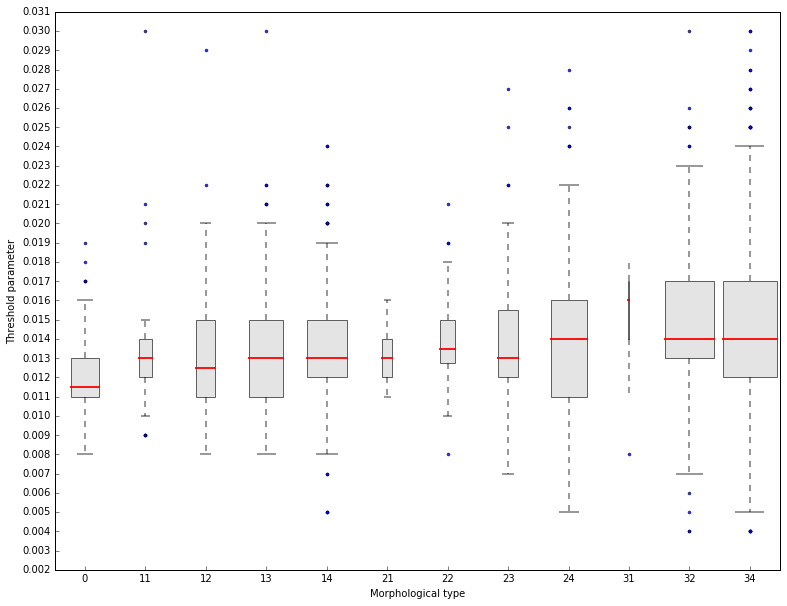

In [222]:
# Create a figure instance
fig = plt.figure(1, figsize=(13, 10))
plt.ylim(0.004, 0.030)

# Create an axes instance
ax = fig.add_subplot(111)

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start-0.002, end+0.002, 0.001))

# Create the boxplot for approach C
boxplotElements = ax.boxplot(data_to_plot_C, patch_artist=True, 
                             whis = 1.5, widths=boxes_widths_standard)

## change outline color, fill color and linewidth of the boxes
for element in boxplotElements['boxes']:
    element.set_edgecolor('black')
    element.set_facecolor('lightgrey')
    element.set_linewidth(1)
    #element.set_linestyle('dashed')
    element.set_fill(True)
    element.set_alpha(0.6)
    #element.set_hatch('/')

## change color and linewidth of the whiskers
for element in boxplotElements['whiskers']:
    element.set_color('black')
    element.set_linewidth(2)
    element.set_alpha(0.4)

## change color and linewidth of the caps
for element in boxplotElements['caps']:
    element.set_color('black')
    element.set_linewidth(2)
    element.set_alpha(0.4)
    
## change color and linewidth of the medians
for element in boxplotElements['medians']:
    element.set_color('red')
    element.set_linewidth(2)
    element.set_alpha(0.9)

## change the style of fliers and their fill
for element in boxplotElements['fliers']:
    element.set_color('dark')
    element.set_marker('.')
    element.set_alpha(0.8)
       
## Custom x-axis labels
ax.set_xticklabels(listmorphoname)
ax.set_xlabel('Morphological type')

## Custom y-axis labels
ax.set_ylabel('Threshold parameter')

## Remove top axes and right axes ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# Save the figure
boxplot_output=os.path.join(resultfolder,"boxplot_comparing_approaches.svg")
fig.savefig(boxplot_output, bbox_inches='tight', format='svg', dpi=1200)

In [223]:
resultfolder

'/media/tais/data/MAUPP/WorldView3_Ouagadougou/Segmentation'

**-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-**

# Merging segmentations in one "patched" raster

The different segmentation results of 'i.segment' (raster layers) for each processing tiles will be "patched" (merged) in one resulting raster. 
['r.mapcalc' command](https://grass.osgeo.org/grass71/manuals/r.mapcalc.html) is used to combine all the segmentation rasters together. The 'nmax' expression is used to keep the maximum value of input rasters, excluding the NULL values. 

In [224]:
## Setting the computational region extend to all rasters to be merged 
groupraster=[]
i=0
for rast in grass.list_strings("rast", pattern="best_uspo_zm", mapset=mapsetname, flag='r')[:]:
    groupraster.append(rast)
    print groupraster[i]
    i+=1
print str(len(groupraster))+" raster found" 

best_uspo_zm_1000_rank1@LOCAL_SEGMENT
best_uspo_zm_1001_rank1@LOCAL_SEGMENT
best_uspo_zm_1002_rank1@LOCAL_SEGMENT
best_uspo_zm_1003_rank1@LOCAL_SEGMENT
best_uspo_zm_1004_rank1@LOCAL_SEGMENT
best_uspo_zm_1005_rank1@LOCAL_SEGMENT
best_uspo_zm_1006_rank1@LOCAL_SEGMENT
best_uspo_zm_1007_rank1@LOCAL_SEGMENT
best_uspo_zm_1008_rank1@LOCAL_SEGMENT
best_uspo_zm_1009_rank1@LOCAL_SEGMENT
best_uspo_zm_100_rank1@LOCAL_SEGMENT
best_uspo_zm_1010_rank1@LOCAL_SEGMENT
best_uspo_zm_1011_rank1@LOCAL_SEGMENT
best_uspo_zm_1012_rank1@LOCAL_SEGMENT
best_uspo_zm_1013_rank1@LOCAL_SEGMENT
best_uspo_zm_1014_rank1@LOCAL_SEGMENT
best_uspo_zm_1015_rank1@LOCAL_SEGMENT
best_uspo_zm_1016_rank1@LOCAL_SEGMENT
best_uspo_zm_1017_rank1@LOCAL_SEGMENT
best_uspo_zm_1018_rank1@LOCAL_SEGMENT
best_uspo_zm_1019_rank1@LOCAL_SEGMENT
best_uspo_zm_101_rank1@LOCAL_SEGMENT
best_uspo_zm_1020_rank1@LOCAL_SEGMENT
best_uspo_zm_1021_rank1@LOCAL_SEGMENT
best_uspo_zm_1022_rank1@LOCAL_SEGMENT
best_uspo_zm_1023_rank1@LOCAL_SEGMENT
best_uspo_zm_1

best_uspo_zm_558_rank1@LOCAL_SEGMENT
best_uspo_zm_559_rank1@LOCAL_SEGMENT
best_uspo_zm_55_rank1@LOCAL_SEGMENT
best_uspo_zm_560_rank1@LOCAL_SEGMENT
best_uspo_zm_561_rank1@LOCAL_SEGMENT
best_uspo_zm_562_rank1@LOCAL_SEGMENT
best_uspo_zm_563_rank1@LOCAL_SEGMENT
best_uspo_zm_564_rank1@LOCAL_SEGMENT
best_uspo_zm_565_rank1@LOCAL_SEGMENT
best_uspo_zm_566_rank1@LOCAL_SEGMENT
best_uspo_zm_567_rank1@LOCAL_SEGMENT
best_uspo_zm_568_rank1@LOCAL_SEGMENT
best_uspo_zm_569_rank1@LOCAL_SEGMENT
best_uspo_zm_56_rank1@LOCAL_SEGMENT
best_uspo_zm_570_rank1@LOCAL_SEGMENT
best_uspo_zm_571_rank1@LOCAL_SEGMENT
best_uspo_zm_572_rank1@LOCAL_SEGMENT
best_uspo_zm_573_rank1@LOCAL_SEGMENT
best_uspo_zm_574_rank1@LOCAL_SEGMENT
best_uspo_zm_575_rank1@LOCAL_SEGMENT
best_uspo_zm_576_rank1@LOCAL_SEGMENT
best_uspo_zm_577_rank1@LOCAL_SEGMENT
best_uspo_zm_578_rank1@LOCAL_SEGMENT
best_uspo_zm_579_rank1@LOCAL_SEGMENT
best_uspo_zm_57_rank1@LOCAL_SEGMENT
best_uspo_zm_580_rank1@LOCAL_SEGMENT
best_uspo_zm_581_rank1@LOCAL_SEGMENT
best

In [231]:
## Initialize a empty string for saving print outputs
txtcontent=""

## Setting the computational region extend to all rasters to be merged 
groupraster=[]
for rast in grass.list_strings("rast", pattern="best", mapset=mapsetname, flag='r')[:200]:
    groupraster.append(rast)

## Define computational region 
gscript.run_command('g.region', overwrite=True, raster=groupraster)

## Print and saving current time for processing time management
messagetoprint="Begin to merge "+str(len(groupraster))+" segmentation results on " + time.ctime()+"\n"
print (messagetoprint)
txtcontent+=messagetoprint
begintime_merge=time.time()

## Defining the formula for r.mapcalc
formula="unclumped_segment_raster_A= nmax("+','.join(groupraster)+")"
## Running r.mapcalc to merge all raster together
grass.mapcalc(formula, overwrite=True)

## Compute processing time and print it
messagetoprint=str(len(groupraster))+" ssegmentation results have been merge with 'r.mapcalc'"+"\n\n"
print(messagetoprint)
txtcontent+=messagetoprint
messagetoprint=print_processing_time(begintime_merge, "Merging process achieved in ")
print(messagetoprint)
txtcontent+=messagetoprint

#### Write text file with log of processing time
## Create the .txt file for processing time output and begin to write
f = open(os.path.join(outputfolder,mapsetname+"_processingtime_mergingsegments.txt"), 'w')
f.write(mapsetname+" processing time information for merging segmentation results with mapcalculator"+"\n\n")
f.write(txtcontent)
f.close()

Begin to merge 200 segmentation results on Mon Sep 18 09:11:36 2017

200 ssegmentation results have been merge with 'r.mapcalc'


Merging process achieved in 2 hours and 4 minutes and 41.0 seconds


In [232]:
## Initialize a empty string for saving print outputs
txtcontent=""

## Setting the computational region extend to all rasters to be merged 
groupraster=[]
for rast in grass.list_strings("rast", pattern="best", mapset=mapsetname, flag='r')[200:600]:
    groupraster.append(rast)

## Define computational region 
gscript.run_command('g.region', overwrite=True, raster=groupraster)

## Print and saving current time for processing time management
messagetoprint="Begin to merge "+str(len(groupraster))+" segmentation results on " + time.ctime()+"\n"
print (messagetoprint)
txtcontent+=messagetoprint
begintime_merge=time.time()

## Defining the formula for r.mapcalc
formula="unclumped_segment_raster_B= nmax("+','.join(groupraster)+")"
## Running r.mapcalc to merge all raster together
grass.mapcalc(formula, overwrite=True)

## Compute processing time and print it
messagetoprint=str(len(groupraster))+" ssegmentation results have been merge with 'r.mapcalc'"+"\n\n"
print(messagetoprint)
txtcontent+=messagetoprint
messagetoprint=print_processing_time(begintime_merge, "Merging process achieved in ")
print(messagetoprint)
txtcontent+=messagetoprint

#### Write text file with log of processing time
## Create the .txt file for processing time output and begin to write
f = open(os.path.join(outputfolder,mapsetname+"_processingtime_mergingsegments.txt"), 'w')
f.write(mapsetname+" processing time information for merging segmentation results with mapcalculator"+"\n\n")
f.write(txtcontent)
f.close()

Begin to merge 400 segmentation results on Mon Sep 18 11:16:18 2017

400 ssegmentation results have been merge with 'r.mapcalc'


Merging process achieved in 5 hours and 21 minutes and 58.8 seconds


In [233]:
## Initialize a empty string for saving print outputs
txtcontent=""

## Setting the computational region extend to all rasters to be merged 
groupraster=[]
for rast in grass.list_strings("rast", pattern="best", mapset=mapsetname, flag='r')[600:1000]:
    groupraster.append(rast)

## Define computational region 
gscript.run_command('g.region', overwrite=True, raster=groupraster)

## Print and saving current time for processing time management
messagetoprint="Begin to merge "+str(len(groupraster))+" segmentation results on " + time.ctime()+"\n"
print (messagetoprint)
txtcontent+=messagetoprint
begintime_merge=time.time()

## Defining the formula for r.mapcalc
formula="unclumped_segment_raster_C= nmax("+','.join(groupraster)+")"
## Running r.mapcalc to merge all raster together
grass.mapcalc(formula, overwrite=True)

## Compute processing time and print it
messagetoprint=str(len(groupraster))+" ssegmentation results have been merge with 'r.mapcalc'"+"\n\n"
print(messagetoprint)
txtcontent+=messagetoprint
messagetoprint=print_processing_time(begintime_merge, "Merging process achieved in ")
print(messagetoprint)
txtcontent+=messagetoprint

#### Write text file with log of processing time
## Create the .txt file for processing time output and begin to write
f = open(os.path.join(outputfolder,mapsetname+"_processingtime_mergingsegments.txt"), 'w')
f.write(mapsetname+" processing time information for merging segmentation results with mapcalculator"+"\n\n")
f.write(txtcontent)
f.close()

Begin to merge 400 segmentation results on Mon Sep 18 16:38:17 2017

400 ssegmentation results have been merge with 'r.mapcalc'


Merging process achieved in 6 hours and 9 minutes and 23.3 seconds


In [243]:
## Initialize a empty string for saving print outputs
txtcontent=""

## Setting the computational region extend to all rasters to be merged 
groupraster=[]
for rast in grass.list_strings("rast", pattern="best", mapset=mapsetname, flag='r')[1000:1400]:
    groupraster.append(rast)

## Define computational region 
gscript.run_command('g.region', overwrite=True, raster=groupraster)

## Print and saving current time for processing time management
messagetoprint="Begin to merge "+str(len(groupraster))+" segmentation results on " + time.ctime()+"\n"
print (messagetoprint)
txtcontent+=messagetoprint
begintime_merge=time.time()

## Defining the formula for r.mapcalc
formula="unclumped_segment_raster_D= nmax("+','.join(groupraster)+")"
## Running r.mapcalc to merge all raster together
grass.mapcalc(formula, overwrite=True)

## Compute processing time and print it
messagetoprint=str(len(groupraster))+" ssegmentation results have been merge with 'r.mapcalc'"+"\n\n"
print(messagetoprint)
txtcontent+=messagetoprint
messagetoprint=print_processing_time(begintime_merge, "Merging process achieved in ")
print(messagetoprint)
txtcontent+=messagetoprint

#### Write text file with log of processing time
## Create the .txt file for processing time output and begin to write
f = open(os.path.join(outputfolder,mapsetname+"_processingtime_mergingsegments.txt"), 'w')
f.write(mapsetname+" processing time information for merging segmentation results with mapcalculator"+"\n\n")
f.write(txtcontent)
f.close()

Begin to merge 400 segmentation results on Wed Sep 20 14:40:03 2017

400 ssegmentation results have been merge with 'r.mapcalc'


Merging process achieved in 5 hours and 40 minutes and 15.8 seconds


In [239]:
## Initialize a empty string for saving print outputs
txtcontent=""

## Setting the computational region extend to all rasters to be merged 
groupraster=[]
for rast in grass.list_strings("rast", pattern="best", mapset=mapsetname, flag='r')[1400:]:
    groupraster.append(rast)

## Define computational region 
gscript.run_command('g.region', overwrite=True, raster=groupraster)

## Print and saving current time for processing time management
messagetoprint="Begin to merge "+str(len(groupraster))+" segmentation results on " + time.ctime()+"\n"
print (messagetoprint)
txtcontent+=messagetoprint
begintime_merge=time.time()

## Defining the formula for r.mapcalc
formula="unclumped_segment_raster_E= nmax("+','.join(groupraster)+")"
## Running r.mapcalc to merge all raster together
grass.mapcalc(formula, overwrite=True)

## Compute processing time and print it
messagetoprint=str(len(groupraster))+" ssegmentation results have been merge with 'r.mapcalc'"+"\n\n"
print(messagetoprint)
txtcontent+=messagetoprint
messagetoprint=print_processing_time(begintime_merge, "Merging process achieved in ")
print(messagetoprint)
txtcontent+=messagetoprint

#### Write text file with log of processing time
## Create the .txt file for processing time output and begin to write
f = open(os.path.join(outputfolder,mapsetname+"_processingtime_mergingsegments.txt"), 'w')
f.write(mapsetname+" processing time information for merging segmentation results with mapcalculator"+"\n\n")
f.write(txtcontent)
f.close()

Begin to merge 282 segmentation results on Wed Sep 20 11:27:45 2017

282 ssegmentation results have been merge with 'r.mapcalc'


Merging process achieved in 2 hours and 43 minutes and 13.1 seconds


In [244]:
## Initialize a empty string for saving print outputs
txtcontent=""

## Setting the computational region extend to all rasters to be merged 
groupraster=[]
for rast in grass.list_strings("rast", pattern="unclumped_segment_raster_", mapset=mapsetname, flag='r')[:]:
    groupraster.append(rast)

## Define computational region 
gscript.run_command('g.region', overwrite=True, raster=groupraster)

## Print and saving current time for processing time management
messagetoprint="Begin to merge "+str(len(groupraster))+" segmentation results on " + time.ctime()+"\n"
print (messagetoprint)
txtcontent+=messagetoprint
begintime_merge=time.time()

## Defining the formula for r.mapcalc
formula="unclumped_segment_raster= nmax("+','.join(groupraster)+")"
## Running r.mapcalc to merge all raster together
grass.mapcalc(formula, overwrite=True)

## Compute processing time and print it
messagetoprint=str(len(groupraster))+" ssegmentation results have been merge with 'r.mapcalc'"+"\n\n"
print(messagetoprint)
txtcontent+=messagetoprint
messagetoprint=print_processing_time(begintime_merge, "Merging process achieved in ")
print(messagetoprint)
txtcontent+=messagetoprint

#### Write text file with log of processing time
## Create the .txt file for processing time output and begin to write
f = open(os.path.join(outputfolder,mapsetname+"_processingtime_mergingsegments.txt"), 'w')
f.write(mapsetname+" processing time information for merging segmentation results with mapcalculator"+"\n\n")
f.write(txtcontent)
f.close()

Begin to merge 5 segmentation results on Wed Sep 20 20:20:19 2017

5 ssegmentation results have been merge with 'r.mapcalc'


Merging process achieved in 9 minutes and 3.4 seconds


### Clump patched raster  

We use here the ['r.clump' command](https://grass.osgeo.org/grass71/manuals/r.clump.html) to allow a new (unique) ID for each group of pixels with different values from their neighbors (because segments resulting from 'i.segment' on different processing tiles could have the same ID after being patched in the precedent step).

In [247]:
## Initialize a empty string for saving print outputs
txtcontent=""

## Print and saving current time for processing time management
messagetoprint="Begin clump of segmentation raster on " + time.ctime()+"\n"
print (messagetoprint)
txtcontent+=messagetoprint
begintime_clump=time.time()

## Generate new individual values for group of pixels
gscript.run_command('r.clump', overwrite=True, input="unclumped_segment_raster@"+mapsetname, 
                  output="segmentation_raster@"+mapsetname)

## Compute processing time and print it
messagetoprint=print_processing_time(begintime_clump, "Segment raster have been clumped in ")
print (messagetoprint)
txtcontent+=messagetoprint

## Compute basic statistics about the clumped raster. The maximum value correspond to the number of objets (patchs)
nbrobject=grass.raster_info("segmentation_raster")
messagetoprint="The segment raster contains "+str(int(nbrobject.max))+" objects"+"\n\n"
print(messagetoprint)
txtcontent+=messagetoprint

#### Write text file with log of processing time
## Create the .txt file for processing time output and begin to write
f = open(os.path.join(outputfolder,mapsetname+"_processingtime_clumpsegment.txt"), 'w')
f.write(mapsetname+" processing time information for clumping segmentation_raster with r.clump"+"\n\n")
f.write(txtcontent)
f.close()

Begin clump of segmentation raster on Thu Sep 21 09:23:40 2017

Segment raster have been clumped in 1 hours and 3 minutes and 23.8 seconds
The segment raster contains 15775526 objects




### Export segmentation as .tif image

In [248]:
outputfolder

'/media/tais/data/MAUPP/WorldView3_Ouagadougou/Segmentation/LOCAL_SEGMENT/i.segment.uspo'

In [249]:
## Set the region to match the extend of the layer
gscript.run_command('g.region', raster='segmentation_raster')
## Export the vector layer as Shapefile
gscript.run_command('r.out.gdal', input='segmentation_raster', 
                  output=os.path.join(outputfolder,mapsetname+"segmentation_raster.tif"),
                  format='GTiff')

0

### Vectorize segmentation raster and export it as Shapefile

### Erase intermediate maps

The next cell will remove all the temporary files needed for the different previous steps. Be careful to be sure that your 'segmentation_raster' has correctly been processed before running this part, otherwise you should start all the segmentation part of this script again.

In [252]:
## Print 
print ("Begin deleting temporary maps on " + time.ctime())

## Delete individual segmentation rasters 
gscript.run_command('g.remove', flags="rf", type="raster", pattern="best_uspo_zm")

## Delete unclumped segmentation rasters 
gscript.run_command('g.remove', flags="rf", type="raster", pattern="unclumped_segment_raster")

Begin deleting temporary maps on Thu Sep 21 12:05:48 2017


0

**-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-**

<center> *-*-*-*-*-*-*-*-*-*-*-* </center> 

<left> <font size=4> <b> End of segmentation part </b> </font> </left> 

In [253]:
print("The script ends at "+ time.ctime())
print_processing_time(begintime_segmentation_full, "Entire process has been achieved in ")

The script ends at Thu Sep 21 12:06:54 2017


NameError: name 'begintime_segmentation_full' is not defined

**-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-**